In [18]:
# Python lib for manipulating data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

# Lib for Desicion Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree

import os

# NBA API
# from nba_api.stats.endpoints import playercareerstats
# from nba_api.stats.endpoints import playerdashboardbyyearoveryear

In [19]:
# Open CSV file for a player
player = "LeBron James"

rows_list = []
with open("../Scrapping/players_stats/" + player + ".csv", mode="r") as infile:
    reader = csv.reader(infile)
    for rows in reader:
        rows_list.append(rows)

# separate header from data
header = rows_list[0]
data = rows_list[1:]

# create a df with header and data
df = pd.DataFrame(data, columns=header)
print(df)

   PLAYER_ID SEASON_ID LEAGUE_ID     TEAM_ID TEAM_ABBREVIATION PLAYER_AGE  GP  \
0       2544   2003-04        00  1610612739               CLE       19.0  79   
1       2544   2004-05        00  1610612739               CLE       20.0  80   
2       2544   2005-06        00  1610612739               CLE       21.0  79   
3       2544   2006-07        00  1610612739               CLE       22.0  78   
4       2544   2007-08        00  1610612739               CLE       23.0  75   
5       2544   2008-09        00  1610612739               CLE       24.0  81   
6       2544   2009-10        00  1610612739               CLE       25.0  76   
7       2544   2010-11        00  1610612748               MIA       26.0  79   
8       2544   2011-12        00  1610612748               MIA       27.0  62   
9       2544   2012-13        00  1610612748               MIA       28.0  76   
10      2544   2013-14        00  1610612748               MIA       29.0  77   
11      2544   2014-15      

In [20]:
# Sepacialize data for the AI
data = df[['OREB', 'DREB', 'FTM', 'FTA', 'PF', 'FGM', 'FGA']]
target = df[['PTS']]

In [21]:
# We create the model
model_tree = DecisionTreeClassifier()

In [22]:
# We train the model 
model_tree.fit(data, target)

DecisionTreeClassifier()

In [23]:
# prinnting text representation
text_reprensation = export_text(model_tree, feature_names=list(data))
print(text_reprensation)

|--- FGA <= 560.00
|   |--- class: 361
|--- FGA >  560.00
|   |--- FTM <= 216.00
|   |   |--- class: 1126
|   |--- FTM >  216.00
|   |   |--- FTM <= 259.00
|   |   |   |--- class: 1695
|   |   |--- FTM >  259.00
|   |   |   |--- OREB <= 54.00
|   |   |   |   |--- class: 1743
|   |   |   |--- OREB >  54.00
|   |   |   |   |--- FGA <= 1132.00
|   |   |   |   |   |--- class: 1505
|   |   |   |   |--- FGA >  1132.00
|   |   |   |   |   |--- FTM <= 305.50
|   |   |   |   |   |   |--- class: 1698
|   |   |   |   |   |--- FTM >  305.50
|   |   |   |   |   |   |--- FTA <= 475.50
|   |   |   |   |   |   |   |--- class: 1654
|   |   |   |   |   |   |--- FTA >  475.50
|   |   |   |   |   |   |   |--- FTM <= 358.50
|   |   |   |   |   |   |   |   |--- class: 1954
|   |   |   |   |   |   |   |--- FTM >  358.50
|   |   |   |   |   |   |   |   |--- PF <= 103.00
|   |   |   |   |   |   |   |   |   |--- class: 1683
|   |   |   |   |   |   |   |   |--- PF >  103.00
|   |   |   |   |   |   |   |   |   |-

IndexError: list index out of range

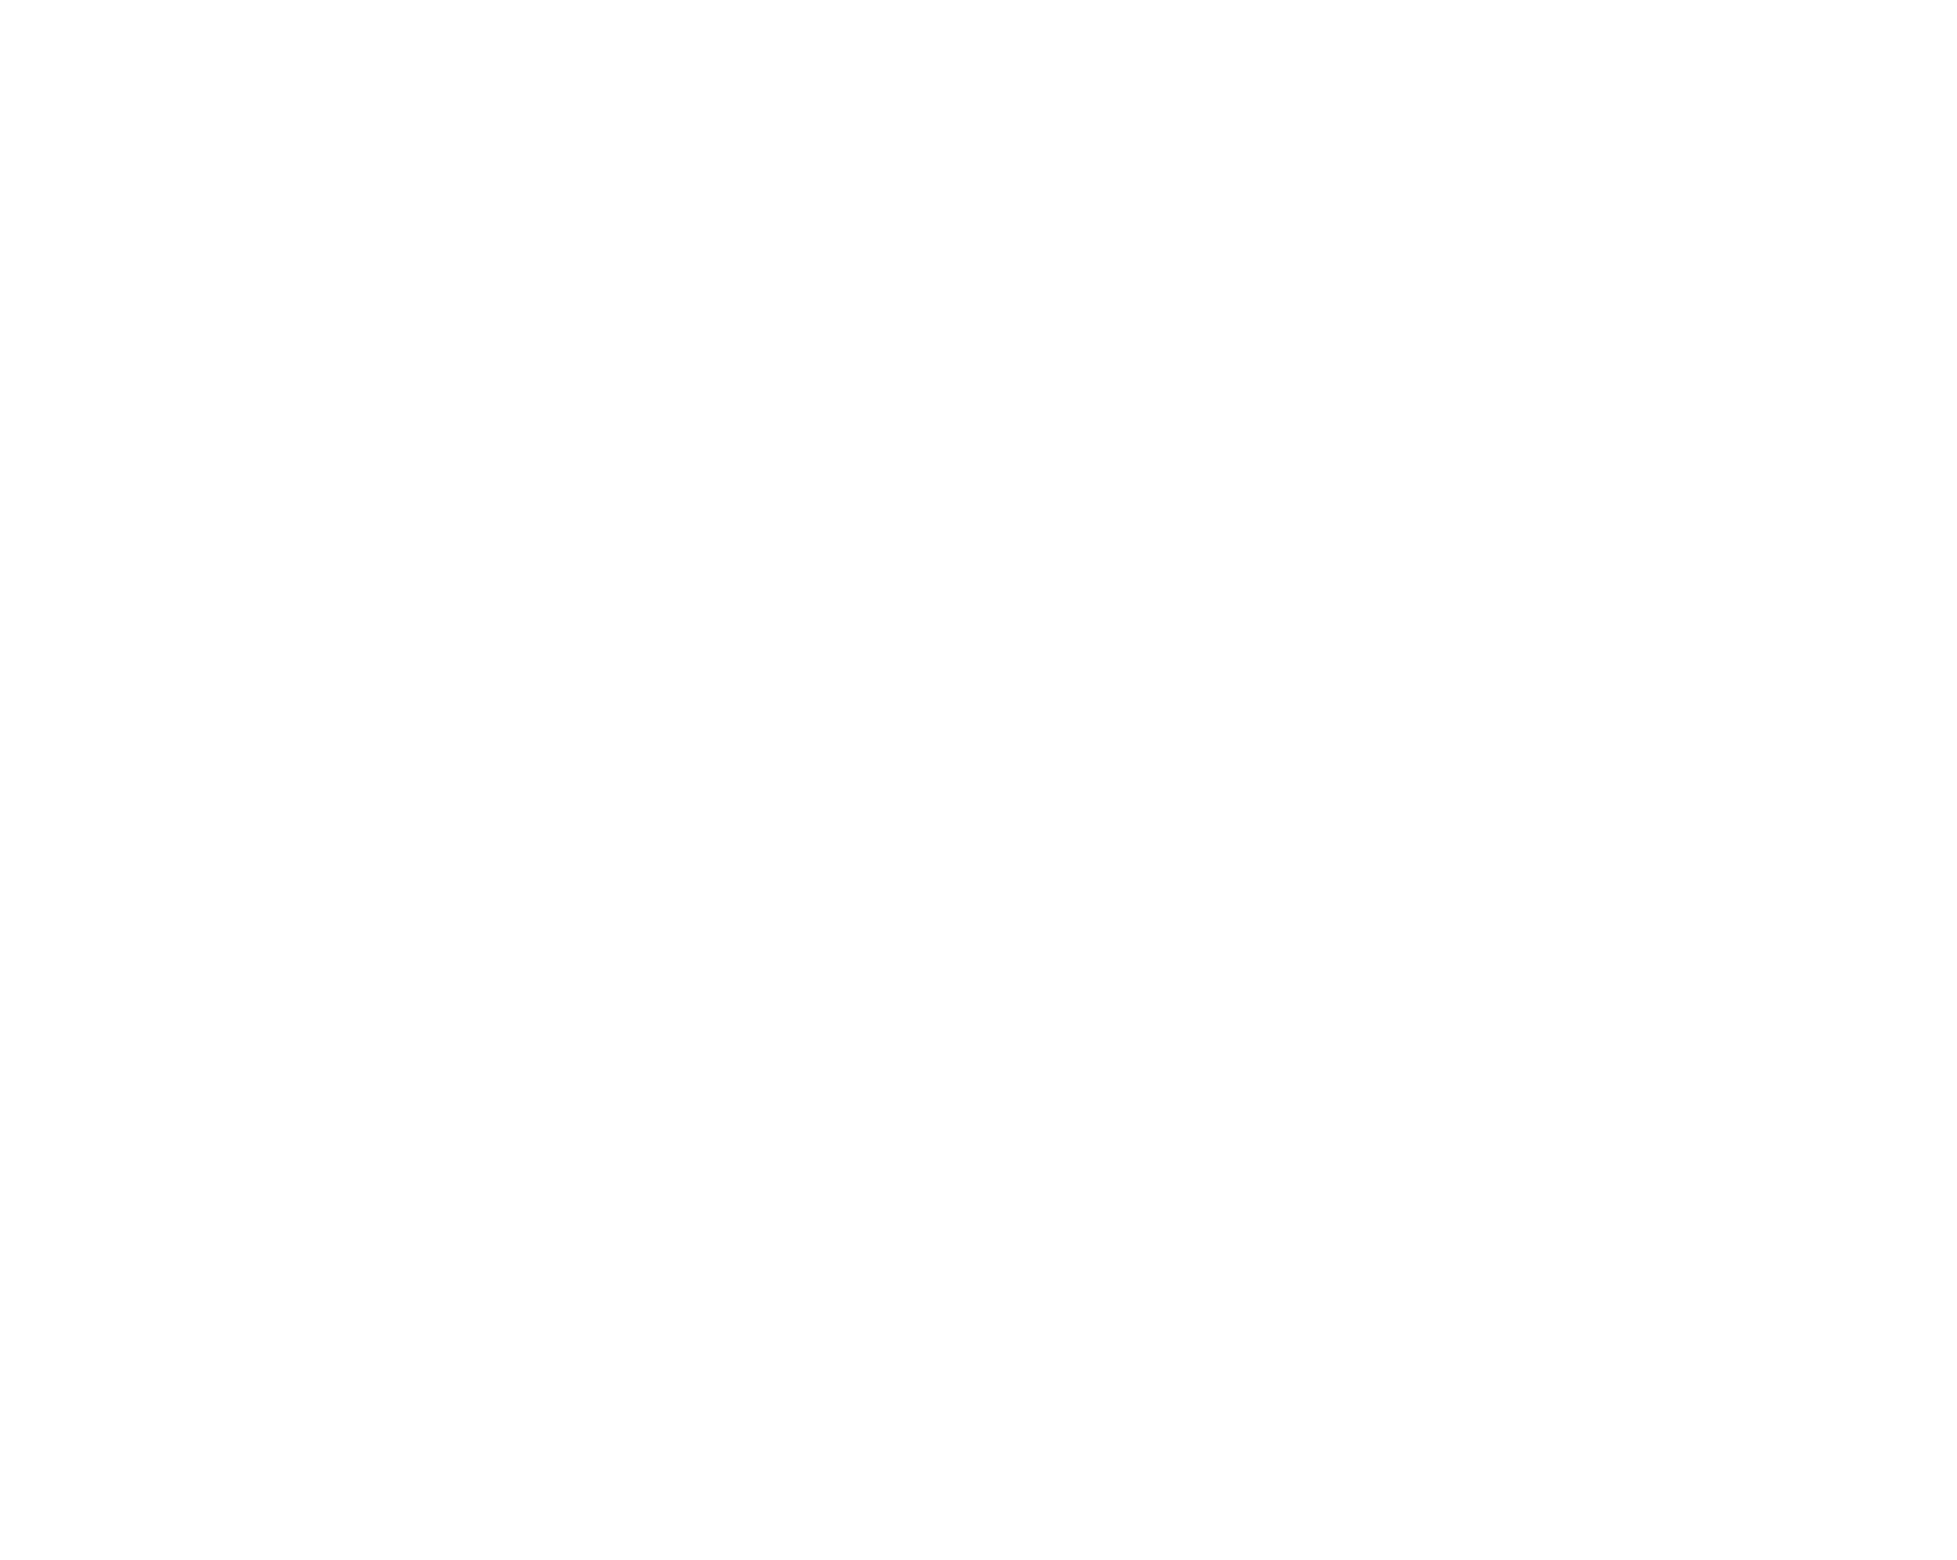

In [24]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(model_tree,
                feature_names=list(data),
                class_names=list(target),
                filled=True)
                

In [25]:
# predict with new data
new_data = [[0, 0, 0, 0, 0, 0, 0]]
prediction = model_tree.predict(new_data)
print(prediction)

['361']


d:\AI_Course\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
